# Data Wrangling | Twitter ( HK NLP Project )

# Table of Contents
* [1 Twitter Wrangling](#2_Data_wrangling)
  * [1.1 Contents](#Contents)
  * [1.2 Imports & Set Up](#imports)
  * [1.3 Initial Scraping before Regex](#int_scrape)
  * [1.4 Regex](#regex)
  * [1.5 xxxxxxxxxxxxxx](#_____)
  * [1.6 xxxxxxxxxxxxxx](#_____)
  * [1.7 xxxxxxxxxxxxxx](#_____)
  * [1.8 xxxxxxxxxxxxxx](#_____)
  * [1.9 xxxxxxxxxxxxxx](#_____)
  * [1.10 Pulling them together](#1.15_ptt)



# **1.1 Contents**<a id='Contents'></a>

This is where you will summarize your intent. Mention you used `twint`

# **1.2 Imports & Set Up**<a id='imports'></a>

In [616]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

import twint
import nest_asyncio
nest_asyncio.apply()

In [568]:
%reload_ext watermark

In [569]:
%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas: 1.1.3



In [570]:
os.getcwd()

'C:\\Users\\rands'

# **1.3 Initial Scraping before Regex**<a id='int_scrape'></a>

In [571]:
df = pd.read_excel('tweets.xlsx')
df = df.reset_index()
df = df.drop(columns=['Unnamed: 0','index'])

In [572]:
df.head(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags
0,#FightForHongKong,2020-08-28 10:23:06 Eastern Daylight Time,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...,en,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']"
1,#FightForHongKong,2020-08-27 11:15:39 Eastern Daylight Time,dani_tasso,Razzismo e democrazia. Sfaccettature del med...,it,1,0,2,[],"['blacklivesmatter', 'fightforhongkong', 'open..."


In [573]:
len(df)

288416

We will take a **look at where duplicates** may be found with the **`tweet` column**. Our initial focus is on **when a "tweeter"** (also known a person) **used multiple hashtags**.

A seperate data frame will be used to ensure the original is not compromised.

In [574]:
df_tweets = df.copy()
df_tweets = pd.DataFrame(df_tweets)
len(df_tweets)

288416

In [575]:
df_tweets.tail(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags
288414,#hkpoliceterrorism,2020-05-31 23:50:53 Eastern Daylight Time,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia..."
288415,#hkpoliceterrorism,2020-05-31 22:40:41 Eastern Daylight Time,jack83352493,#HongKongProtest #StandwithHK #HKPoliceTerrori...,und,0,0,0,[],"['hongkongprotest', 'standwithhk', 'hkpolicete..."


In [655]:
duplicated_tf = df_tweets.duplicated(subset=['tweet'])
duplicated_tf = pd.DataFrame(duplicated_tf)
len(duplicated_tf)

288416

In [656]:
duplicated_tf.columns = ['Duplicated']
duplicated_tf.tail(3)

,Duplicated
288413,False
288414,False
288415,True


In [578]:
num = {True:1,False:0}
duplicated_tf['Duplicated_TorF'] = duplicated_tf['Duplicated'].map(num)
duplicated_tf.tail(3)

,Duplicated,Duplicated_TorF
288413,False,0
288414,False,0
288415,True,1


In [579]:
duplicated_tf = duplicated_tf.drop(columns=['Duplicated'])

In [580]:
df_tweets_w_dup = pd.concat([df_tweets,duplicated_tf],
                    axis = 1, ignore_index=False)
df_tweets_w_dup = df_tweets_w_dup.reset_index(drop=True)

In [581]:
df_tweets_w_dup.tail()

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
288411,#hkpoliceterrorism,2020-06-01 03:03:45 Eastern Daylight Time,bluedreamsplan2,Don't fall into the trap! #HKPoliceTerrorism #...,en,0,0,0,[],"['hkpoliceterrorism', 'hongkongpolicestate', '...",0
288412,#hkpoliceterrorism,2020-06-01 02:57:45 Eastern Daylight Time,villafish129,@KingJames #AllLivesMatters . #PoliceBrutality...,en,0,0,0,"[{'screen_name': 'KingJames', 'name': 'LeBron ...","['alllivesmatters', 'policebrutality', 'police...",1
288413,#hkpoliceterrorism,2020-05-31 23:58:09 Eastern Daylight Time,dingdin34098358,@ajphelo @HK55020097 The HK police killed a So...,en,0,1,1,"[{'screen_name': 'ajphelo', 'name': 'Andrew J ...","['policebrutality', 'hkpoliceterrorism']",0
288414,#hkpoliceterrorism,2020-05-31 23:50:53 Eastern Daylight Time,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0
288415,#hkpoliceterrorism,2020-05-31 22:40:41 Eastern Daylight Time,jack83352493,#HongKongProtest #StandwithHK #HKPoliceTerrori...,und,0,0,0,[],"['hongkongprotest', 'standwithhk', 'hkpolicete...",1


In [582]:
print('Checking to ensure we still have the same # of tweets after classification; this should be Zero change', ( ( len(df_tweets_w_dup) / len(df) ) - 1 ) * 100)

Checking to ensure we still have the same # of tweets after classification; this should be Zero change 0.0


Would like to investigate the languages herein.

<AxesSubplot:xlabel='Language Abbrevation', ylabel='# of observed Tweets'>

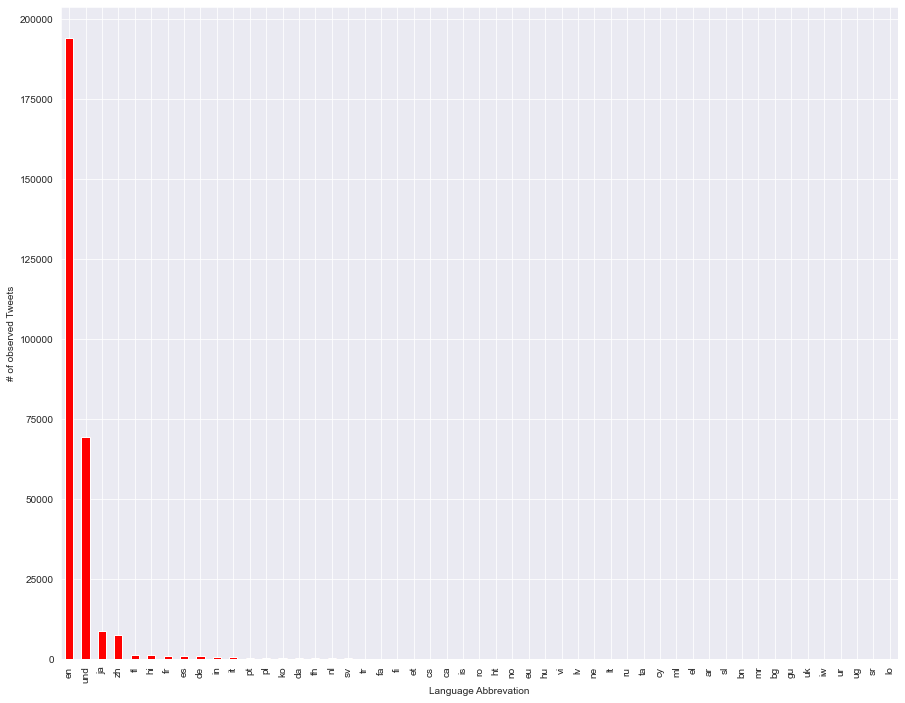

In [583]:
lang = pd.value_counts(df_tweets_w_dup['language'].values, sort=True)
lang = lang.sort_values(ascending=False)
plt.subplots(figsize=(15, 12))
plt.ylabel('# of observed Tweets')
plt.xlabel('Language Abbrevation')
lang.plot.bar(color='r')

In [658]:
df_tweets_w_dup['language'].value_counts().head(10)

en     194087
und     69375
ja       8715
zh       7327
tl       1254
hi       1207
fr       1046
es        908
de        892
in        507
Name: language, dtype: int64

In [674]:
lang_count = df_tweets_w_dup['language']
round(lang_count.value_counts(normalize=True),2).head()

en     0.67
und    0.24
ja     0.03
zh     0.03
tl     0.00
Name: language, dtype: float64

**`en` & `und` is contributing 91%. While `zh`'s contribution is only 3%, Mandarin Chinese is important; I will unfortunately have to pass as it is unlikely to move the analysis outcome.**

**`und` refers to unknown. I am unsure as to what implications removing would do. Let's see what is "unknown".**

In [585]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'].head(25)

9       https://t.co/8lgfzmGtav   #lukashenko #Tikhan...
17     #FreeAgness #FightForFreedom #StandWithHongKon...
18     #Hongkongers  #hongkong #beijing #china #HongK...
20     #boycottchina #hongkong #freehk #boycottmulan ...
21      https://t.co/B5KWeYZE6t #boycottchina #hongko...
33     #umbrellamovement #hongkongprotest #hkhumanrig...
37            #FightForHongKong  https://t.co/C5dAXctB7X
39                   @yasmine_bw19 #FightForHongKong ✨✋🏼
40     #香港 #hongkong #hongkongprotest #hkprotest #黑警 ...
42     #白紙文宣行動  #白紙文宣 #whitepaperterror #fightforhong...
43     @StateDept @joshuawongcf @SecPompeo ✌️#FightFo...
44     @HongKongPLG @AngelineChanHK #UnitedWeStand  #...
48                                     #fightforHongkong
50     #Hongkongers  #hongkong #KnockoutBlow #beijing...
52                  #FightForHongKong  #HongKongProtests
55     #boycottchina #hongkong #freehk #boycottmulan ...
56     #boycottchina #hongkong #freehk #boycottmulan ...
71     #StandWithKashmir #FreeP

These appear to be tweets with **only hashtags**; while that may be important & it's contribution is large, **this excerise pertains to the text.**

**Further investigation may be required** at a later date but for now, **we will unfortunately drop them as well.**

In [587]:
df_tweets_w_dup_en = df_tweets_w_dup[df_tweets_w_dup['language'].str.contains("en")]

In [588]:
df_tweets_w_dup_en.tail()

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
288410,#hkpoliceterrorism,2020-06-01 03:21:48 Eastern Daylight Time,andrewhe2,@SpokespersonCHN Ms Hua please help them. #ICa...,en,0,0,0,"[{'screen_name': 'SpokespersonCHN', 'name': 'H...","['icantbreathe', 'icantbreath', 'icantbreathea...",1
288411,#hkpoliceterrorism,2020-06-01 03:03:45 Eastern Daylight Time,bluedreamsplan2,Don't fall into the trap! #HKPoliceTerrorism #...,en,0,0,0,[],"['hkpoliceterrorism', 'hongkongpolicestate', '...",0
288412,#hkpoliceterrorism,2020-06-01 02:57:45 Eastern Daylight Time,villafish129,@KingJames #AllLivesMatters . #PoliceBrutality...,en,0,0,0,"[{'screen_name': 'KingJames', 'name': 'LeBron ...","['alllivesmatters', 'policebrutality', 'police...",1
288413,#hkpoliceterrorism,2020-05-31 23:58:09 Eastern Daylight Time,dingdin34098358,@ajphelo @HK55020097 The HK police killed a So...,en,0,1,1,"[{'screen_name': 'ajphelo', 'name': 'Andrew J ...","['policebrutality', 'hkpoliceterrorism']",0
288414,#hkpoliceterrorism,2020-05-31 23:50:53 Eastern Daylight Time,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0


In [589]:
len(df_tweets_w_dup_en)

194087

That matches the above so now we will remove duplicates.

In [590]:
df_tweets_wout_dup_en = df_tweets_w_dup_en[df_tweets_w_dup_en['Duplicated_TorF']==0]

Confirming that worked we will bring the data frame that did not delete the duplicates back & see what the sum of the `Duplicates_TorF` column is; as a reminder, **a duplicate has a 1 & the non-Duplicate has a 0.**

In [591]:
sum(df_tweets_w_dup_en['Duplicated_TorF'])

30388

So there was ~30k identified duplicates, so what is the length of the dataframe without duplicates.

In [592]:
sum(df_tweets_wout_dup_en['Duplicated_TorF'])

0

In [593]:
duplicated_tf_next = df_tweets_wout_dup_en.duplicated(subset=['tweet'])
duplicated_tf_next = pd.DataFrame(duplicated_tf_next)
duplicated_tf_next.columns = ['Duplicated_check']
duplicated_tf_next.Duplicated_check.unique()

array([False])

**A Zero & a complete list of False essentially says there are no duplicates.**

In [594]:
len(df_tweets_wout_dup_en)

163699

That's yet another cut albeit it's expected given the source in which we are working with.

**We will take a look at what percent of the original total we have left.**

In [595]:
round((( len(df_tweets_wout_dup_en) / len(df) ) * 100),2 )

56.76

**Before sending the Dataframe to Regex, we will hold on to it on the side for reference.**

In [596]:
df_tweets_wout_dup_en.to_excel('df_tweets_wout_dup_en.xlsx')
print('Finished')

Finished


**We will also take a visual look at the Tweets contribution to the data frame**.

<Figure size 1080x432 with 0 Axes>

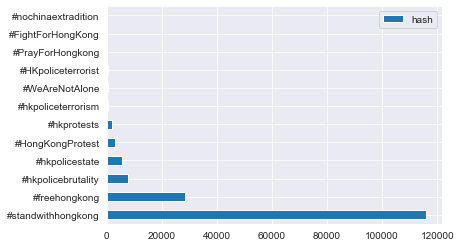

,hash
#standwithhongkong,115780
#freehongkong,28501
#hkpolicebrutality,7565
#hkpolicestate,5424
#HongKongProtest,2954
#hkprotests,1933
#hkpoliceterrorism,567
#WeAreNotAlone,453
#HKpoliceterrorist,325
#PrayForHongkong,133


In [688]:
# Moving the number of tweets into a seperate column to identify usage
twits = pd.DataFrame(df_tweets_wout_dup_en['hash'].value_counts())

# Taking a look visually
plt.figure(figsize=(15, 6))
twits.plot.barh()
plt.show()
twits

In [650]:
# Understanding their total contribution to the data frame
twits['hash_pct'] = round((( twits.hash / twits.hash.sum() ) * 100),2)
twits

,hash,hash_pct
#standwithhongkong,115780,70.73
#freehongkong,28501,17.41
#hkpolicebrutality,7565,4.62
#hkpolicestate,5424,3.31
#HongKongProtest,2954,1.80
#hkprotests,1933,1.18
#hkpoliceterrorism,567,0.35
#WeAreNotAlone,453,0.28
#HKpoliceterrorist,325,0.20
#PrayForHongkong,133,0.08


In [652]:
# The top 2 seem to control the data frame; simple math but would like to store it for later use 
twits['hash_pct']['#standwithhongkong'] + twits['hash_pct']['#freehongkong']

88.14

A little shy of **~90% of the total are in 2 tweets**. No actionable item required, **this was for reference.**

# 1.4 Regex<a id='regex'></a>